In [3]:
import pandas as pd

## Nettoyage des données (2/4)

Ce notebook a pour but de nettoyer les données du dataset "NCAA players" 

In [6]:
df = pd.read_csv('data/ncaa_players.csv')
df.head()

,Unnamed: 0,assist_percentage,assists,block_percentage,blocks,box_plus_minus,conference,defensive_box_plus_minus,defensive_rebound_percentage,defensive_rebounds,...,turnovers,two_point_attempts,two_point_percentage,two_pointers,usage_percentage,weight,win_shares,win_shares_per_40_minutes,name,id
0,2007-08,11.8,47,0.5,6,NaN,mwc,NaN,NaN,94.0,...,68.0,105,0.505,53,15.9,200.0,1.8,0.072,Evan Washington,evan-washington-1
1,2008-09,16.3,59,1.1,10,NaN,mwc,NaN,NaN,109.0,...,58.0,139,0.468,65,18.5,200.0,0.6,0.029,Evan Washington,evan-washington-1
2,2009-10,21.7,94,1.6,11,NaN,mwc,NaN,15.4,119.0,...,65.0,190,0.495,94,20.0,200.0,2.5,0.094,Evan Washington,evan-washington-1
3,2010-11,26.2,127,2.7,20,1.3,mwc,1.3,14.0,123.0,...,61.0,185,0.449,83,17.8,200.0,2.0,0.080,Evan Washington,evan-washington-1
4,Career,19.2,327,1.5,47,1.3,NaN,1.3,14.7,445.0,...,252.0,619,0.477,295,18.1,200.0,7.0,0.070,Evan Washington,evan-washington-1


On supprime l'identifiant du Dataframe qui n'était utile que pour réaliser le scrapping sachant qu'il existait déjà une colonne "player id".

In [7]:
df = df.drop('id', 1)

#### Changement de position des colonnes

Pour une question de visibilité, les colonnes "saison", "player_id" et "name" seront les premières colonnes du dataframe

In [8]:
def change_position_col(col_name, df):
    col = df.pop(col_name)
    df.insert(0,col.name,col)

In [9]:
change_position_col('name',df)
df.head()

,name,Unnamed: 0,assist_percentage,assists,block_percentage,blocks,box_plus_minus,conference,defensive_box_plus_minus,defensive_rebound_percentage,...,true_shooting_percentage,turnover_percentage,turnovers,two_point_attempts,two_point_percentage,two_pointers,usage_percentage,weight,win_shares,win_shares_per_40_minutes
0,Evan Washington,2007-08,11.8,47,0.5,6,NaN,mwc,NaN,NaN,...,0.547,26.5,68.0,105,0.505,53,15.9,200.0,1.8,0.072
1,Evan Washington,2008-09,16.3,59,1.1,10,NaN,mwc,NaN,NaN,...,0.490,21.2,58.0,139,0.468,65,18.5,200.0,0.6,0.029
2,Evan Washington,2009-10,21.7,94,1.6,11,NaN,mwc,NaN,15.4,...,0.552,18.4,65.0,190,0.495,94,20.0,200.0,2.5,0.094
3,Evan Washington,2010-11,26.2,127,2.7,20,1.3,mwc,1.3,14.0,...,0.478,19.7,61.0,185,0.449,83,17.8,200.0,2.0,0.080
4,Evan Washington,Career,19.2,327,1.5,47,1.3,NaN,1.3,14.7,...,0.517,21.1,252.0,619,0.477,295,18.1,200.0,7.0,0.070


In [10]:
df.rename(columns={'Unnamed: 0': 'Season'}, inplace=True)
df.head()

,name,Season,assist_percentage,assists,block_percentage,blocks,box_plus_minus,conference,defensive_box_plus_minus,defensive_rebound_percentage,...,true_shooting_percentage,turnover_percentage,turnovers,two_point_attempts,two_point_percentage,two_pointers,usage_percentage,weight,win_shares,win_shares_per_40_minutes
0,Evan Washington,2007-08,11.8,47,0.5,6,NaN,mwc,NaN,NaN,...,0.547,26.5,68.0,105,0.505,53,15.9,200.0,1.8,0.072
1,Evan Washington,2008-09,16.3,59,1.1,10,NaN,mwc,NaN,NaN,...,0.490,21.2,58.0,139,0.468,65,18.5,200.0,0.6,0.029
2,Evan Washington,2009-10,21.7,94,1.6,11,NaN,mwc,NaN,15.4,...,0.552,18.4,65.0,190,0.495,94,20.0,200.0,2.5,0.094
3,Evan Washington,2010-11,26.2,127,2.7,20,1.3,mwc,1.3,14.0,...,0.478,19.7,61.0,185,0.449,83,17.8,200.0,2.0,0.080
4,Evan Washington,Career,19.2,327,1.5,47,1.3,NaN,1.3,14.7,...,0.517,21.1,252.0,619,0.477,295,18.1,200.0,7.0,0.070


In [11]:
change_position_col('player_id',df)
df.head()

,player_id,name,Season,assist_percentage,assists,block_percentage,blocks,box_plus_minus,conference,defensive_box_plus_minus,...,true_shooting_percentage,turnover_percentage,turnovers,two_point_attempts,two_point_percentage,two_pointers,usage_percentage,weight,win_shares,win_shares_per_40_minutes
0,evan-washington-1,Evan Washington,2007-08,11.8,47,0.5,6,NaN,mwc,NaN,...,0.547,26.5,68.0,105,0.505,53,15.9,200.0,1.8,0.072
1,evan-washington-1,Evan Washington,2008-09,16.3,59,1.1,10,NaN,mwc,NaN,...,0.490,21.2,58.0,139,0.468,65,18.5,200.0,0.6,0.029
2,evan-washington-1,Evan Washington,2009-10,21.7,94,1.6,11,NaN,mwc,NaN,...,0.552,18.4,65.0,190,0.495,94,20.0,200.0,2.5,0.094
3,evan-washington-1,Evan Washington,2010-11,26.2,127,2.7,20,1.3,mwc,1.3,...,0.478,19.7,61.0,185,0.449,83,17.8,200.0,2.0,0.080
4,evan-washington-1,Evan Washington,Career,19.2,327,1.5,47,1.3,NaN,1.3,...,0.517,21.1,252.0,619,0.477,295,18.1,200.0,7.0,0.070


In [12]:
df.sort_values('player_id').head()

,player_id,name,Season,assist_percentage,assists,block_percentage,blocks,box_plus_minus,conference,defensive_box_plus_minus,...,true_shooting_percentage,turnover_percentage,turnovers,two_point_attempts,two_point_percentage,two_pointers,usage_percentage,weight,win_shares,win_shares_per_40_minutes
128415,aakim-saintil-1,Aakim Saintil,2015-16,30.7,146,0.1,1,-3.7,northeast,-2.2,...,0.512,19.0,90.0,174,0.448,78,24.5,165.0,2.1,0.092
128416,aakim-saintil-1,Aakim Saintil,Career,30.7,146,0.1,1,-3.7,NaN,-2.2,...,0.512,19.0,90.0,174,0.448,78,24.5,165.0,2.1,0.092
94667,aakim-saintill-1,Aakim Saintil,2013-14,16.5,57,0.3,2,-4.1,sun-belt,0.6,...,0.465,17.7,45.0,97,0.371,36,18.3,165.0,1.1,0.061
94668,aakim-saintill-1,Aakim Saintil,Career,16.5,57,0.3,2,-4.1,NaN,0.6,...,0.465,17.7,45.0,97,0.371,36,18.3,165.0,1.1,0.061
14892,aalim-moor-1,Aalim Moor,2009-10,4.5,1,0.0,0,NaN,wac,NaN,...,0.232,38.2,4.0,6,0.167,1,14.7,194.0,-0.1,-0.147


#### Supression des données dupliquées

Pour une question de simplifier l'analyse et la prédiction, seuls les métriques moyennes seront conservées. Ce qui veut dire que que nous allons conserver les statistiques de la carrière (et donc de supprimer les stats par saison). 

Cette décision peut créer du bruit dans les données mais généralement quand un joueur s'inscrit à la draft et il n'est pas selectionné, il ne sera jamais professionnel pour deux raisons :  
- un joueur ne peut s'inscrire qu'une fois à la draft (il n'est donc pas possible de retenter sa chance les années qu'ils suivent)
- un consensus est fait par les 30 équipes NBA que le joueur n'a pas un potentiel intéressant et également les équipes préfèrent prendre des joueurs les plus jeunes possibles  

In [14]:
df_career = df.loc[df["Season"] == "Career"].drop_duplicates()
df_career.set_index('player_id')
df_career.head()

,player_id,name,Season,assist_percentage,assists,block_percentage,blocks,box_plus_minus,conference,defensive_box_plus_minus,...,true_shooting_percentage,turnover_percentage,turnovers,two_point_attempts,two_point_percentage,two_pointers,usage_percentage,weight,win_shares,win_shares_per_40_minutes
4,evan-washington-1,Evan Washington,Career,19.2,327,1.5,47,1.3,NaN,1.3,...,0.517,21.1,252.0,619,0.477,295,18.1,200.0,7.0,0.070
9,grant-parker-1,Grant Parker,Career,10.3,47,1.6,16,NaN,NaN,NaN,...,0.586,14.8,71.0,196,0.541,106,23.4,220.0,3.5,0.113
14,tom-fow-1,Tom Fow,Career,10.0,51,0.8,8,5.1,NaN,-1.3,...,0.599,7.9,46.0,198,0.500,99,25.3,205.0,4.7,0.139
19,michael-lyons-1,Michael Lyons,Career,15.3,214,1.1,27,2.4,NaN,-1.2,...,0.552,14.2,228.0,753,0.541,407,26.7,193.0,9.0,0.103
23,mike-mclain-1,Mike McLain,Career,15.4,58,0.7,5,NaN,NaN,NaN,...,0.469,28.4,75.0,97,0.526,51,18.1,235.0,-0.1,-0.006


Vu qu'il n'y a qu'une ligne pour chaque joueur, le player_id devient l'index de notre dataframe

In [15]:
df_career = df_career.set_index('player_id')
df_career.head()

,name,Season,assist_percentage,assists,block_percentage,blocks,box_plus_minus,conference,defensive_box_plus_minus,defensive_rebound_percentage,...,true_shooting_percentage,turnover_percentage,turnovers,two_point_attempts,two_point_percentage,two_pointers,usage_percentage,weight,win_shares,win_shares_per_40_minutes
player_id,,,,,,,,,,,,,,,,,,,,,
evan-washington-1,Evan Washington,Career,19.2,327,1.5,47,1.3,NaN,1.3,14.7,...,0.517,21.1,252.0,619,0.477,295,18.1,200.0,7.0,0.070
grant-parker-1,Grant Parker,Career,10.3,47,1.6,16,NaN,NaN,NaN,17.1,...,0.586,14.8,71.0,196,0.541,106,23.4,220.0,3.5,0.113
tom-fow-1,Tom Fow,Career,10.0,51,0.8,8,5.1,NaN,-1.3,15.2,...,0.599,7.9,46.0,198,0.500,99,25.3,205.0,4.7,0.139
michael-lyons-1,Michael Lyons,Career,15.3,214,1.1,27,2.4,NaN,-1.2,10.6,...,0.552,14.2,228.0,753,0.541,407,26.7,193.0,9.0,0.103
mike-mclain-1,Mike McLain,Career,15.4,58,0.7,5,NaN,NaN,NaN,15.6,...,0.469,28.4,75.0,97,0.526,51,18.1,235.0,-0.1,-0.006


#### Normalisation des positions

In [18]:
df_career["position"].value_counts()

Guard           11690
Forward          7512
Center           1341
Guard RSCI          3
Forward RSCI        2
D                   1
Name: position, dtype: int64

On cherche à normaliser en 3 catégories : Guard (Meneur, Arrière), Forward (Ailier, Ailier Fort), Center (Pivot)

In [18]:
## Normalisation des positions
mapping = {'Guard RSCI': 'Guard', 'Guard': 'Guard', 'Forward RSCI': 'Forward', 'Forward': 'Forward', 'Center' : 'Center', 'D' : 'Center'}
df_career['position'] = df_career['position'].map(mapping)
df_career["position"].value_counts()

Guard      11693
Forward     7514
Center      1342
Name: position, dtype: int64

#### Conversion Pieds en cm  
Aux Etats Unis, la mesure de taille est réalisée par pieds mais pour une question de statistiques on réalise la conversion en centimètres.

In [26]:
df_career["height"].head()

player_id
evan-washington-1    6-4
grant-parker-1       6-7
tom-fow-1            6-6
michael-lyons-1      6-5
mike-mclain-1        6-8
Name: height, dtype: object

On a également un problème d'absence d'information sur la taille de certains joueurs

In [23]:
# Conversion taille (feet -> cm)
df_career.loc[df_career["height"].isna() == True,['name', 'height']]

,name,height
player_id,,
cody-lay-1,Cody Lay,NaN
chris-roberts-2,Chris Roberts,NaN
chris-wood-1,Chris Wood,NaN
ned-goertzen-1,Ned Goertzen,NaN
darrell-tripp-1,Darrell Tripp,NaN
...,...,...
marlon-taylor-1,Marlon Taylor,NaN
tanner-taylor-1,Tanner Taylor,NaN
andrew-okorodudu-1,Andrew Okorodudu,NaN


In [28]:
def convert_feet_cm(x):
    if isinstance(x, str):
        x = x.split('-')
        x = [int(i) for i in x]
        x[1] += x[0] * 12
        x = round(x[1] * 2.54) + 1
        return x
    else : 
        return x

In [30]:
df_career["height"] = df_career["height"].apply(lambda x : convert_feet_cm(x))
df_career["height"].head()

player_id
evan-washington-1    194.0
grant-parker-1       202.0
tom-fow-1            199.0
michael-lyons-1      197.0
mike-mclain-1        204.0
Name: height, dtype: float64

####  Remplir les NaN avec la moyenne de taille par position

In [32]:
## Fill Na with mean from the same position
df_pos = []
for pos in ["Guard","Forward","Center"] : 
    df_guard = df_career.loc[df_career['position'] == pos ]
    df_guard["height"] = df_guard["height"].apply(lambda x : convert_feet_cm(x))
    df_guard.loc[df_guard["height"].isna() == True]
    df_guard = df_guard.fillna(df_guard.mean())
    df_pos.append(df_guard)
df_career = pd.concat(df_pos)

<ipython-input-32-66429d6201e2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_guard["height"] = df_guard["height"].apply(lambda x : convert_feet_cm(x))


In [39]:
print("Nombre de joueurs sans taille après avoir attribué la moyenne par position :",df_career["height"].isna().sum())
df_career.to_csv("data/cleaned_analysis_ncaa.csv")

Nombre de joueurs sans taille après avoir attribué la moyenne par position : 0


#### Merge des datasets NBA draftés et NCAA

In [43]:
## Dataset des joueurs draftés
df_drafted = pd.read_csv("data/all_rookies.csv")
df_drafted.head()

,index,Pk,Tm,Player,College
0,2010/1,1,WAS,John Wall,Kentucky
1,2010/2,2,PHI,Evan Turner,Ohio State
2,2010/3,3,NJN,Derrick Favors,Georgia Tech
3,2010/4,4,MIN,Wesley Johnson,Syracuse
4,2010/5,5,SAC,DeMarcus Cousins,Kentucky


In [44]:
df_career["drafted"] = df_career["name"].isin(df_drafted["Player"])

In [45]:
df_career.loc[df_career["drafted"] == True,["name","team_abbreviation"]]

,name,team_abbreviation
player_id,,
reggie-jackson-1,Reggie Jackson,boston-college
jimmer-fredette-1,Jimmer Fredette,brigham-young
shelvin-mack-1,Shelvin Mack,butler
orlando-johnson-1,Orlando Johnson,california-santa-barbara
norris-cole-1,Norris Cole,cleveland-state
...,...,...
thomas-welsh-1,Thomas Welsh,ucla
thomas-bryant-1,Thomas Bryant,indiana
diamond-stone-1,Diamond Stone,maryland


Cependant, il y a un problème à régler. Les deux datasets ne possèdent pas le même id pour les joueurs (erreur causée par le site) de ce fait le merge se feront par le nom et prénom.  
Sauf que certains joueurs ont des homonymes. Il faut gérer ce problème pour éviter le bruit de données.

In [46]:
s = df_career.loc[df_career["drafted"] == True].duplicated(subset=["name"])
s[s == True]

player_id
anthony-brown-5       True
dion-waiters-2        True
kyle-anderson-3       True
mike-scott-7          True
cameron-johnson-3     True
cameron-johnson-4     True
anthony-brown-12      True
jordan-williams-3     True
james-anderson-1      True
devin-booker-1        True
jared-cunningham-1    True
jordan-hamilton-1     True
jordan-williams-1     True
jajuan-johnson-1      True
cameron-johnson-1     True
mike-scott-4          True
justin-jackson-3      True
marcus-thornton-2     True
derrick-williams-3    True
tristan-thompson-2    True
joe-harris-1          True
tony-mitchell-4       True
justin-jackson-4      True
jordan-mcrae-2        True
isaiah-thomas-2       True
justin-jackson-5      True
jordan-bell-12        True
robert-williams-3     True
justin-hamilton-2     True
justin-patton-1       True
dtype: bool

In [48]:
duplicates_p = ["justin-hamilton-3",
"justin-jackson-2",
"derrick-williams-3",
"dion-waiters-2",
"jordan-williams-2",
"mike-scott-7",
"jajuan-johnson-2",
"cameron-johnson-2",
"isaiah-thomas-2",
"devin-booker-1",
"tristan-thompson-1",
"robert-williams-2",
"jordan-bell-12"]

for x in duplicates_p:
    df_career.at[x, 'drafted'] = False

In [25]:
#df_career.to_csv("clean_dataset.csv")

In [50]:
df_career["drafted"].value_counts()

False    20068
True       481
Name: drafted, dtype: int64

On retrouve ainsi 481 joueurs draftés et 20 068 non draftés dans notre dataset.

#### Standardisation des statistiques

Pour juger les performances d'un joueur (et les comparer avec d'autres joueurs), il faut toujours mettre diviser ses statistiques par le nombre de matchs joués.  

Première chose à faire est de supprimer les joueurs n'ayant pas joué un match (pour ne pas diviser par 0). Ce n'est pas une grosse perte de données car ils n'auraient pas été draftés.

In [53]:
df_career = df_career.loc[df_career["games_played"] > 0]
df_career.head()

,name,Season,assist_percentage,assists,block_percentage,blocks,box_plus_minus,conference,defensive_box_plus_minus,defensive_rebound_percentage,...,turnover_percentage,turnovers,two_point_attempts,two_point_percentage,two_pointers,usage_percentage,weight,win_shares,win_shares_per_40_minutes,drafted
player_id,,,,,,,,,,,,,,,,,,,,,
evan-washington-1,Evan Washington,Career,19.2,327,1.5,47,1.300000,NaN,1.3000,14.7,...,21.1,252.0,619,0.477,295,18.1,200.0,7.0,0.070,False
michael-lyons-1,Michael Lyons,Career,15.3,214,1.1,27,2.400000,NaN,-1.2000,10.6,...,14.2,228.0,753,0.541,407,26.7,193.0,9.0,0.103,False
todd-fletcher-1,Todd Fletcher,Career,22.5,366,0.4,11,1.200000,NaN,0.5000,9.7,...,19.4,172.0,310,0.555,172,14.8,183.0,8.0,0.093,False
avery-merriex-1,Avery Merriex,Career,12.4,46,0.4,2,-3.023823,NaN,-0.5633,7.7,...,28.7,42.0,69,0.420,29,10.9,190.0,0.2,0.008,False
shawn-hempsey-1,Shawn Hempsey,Career,19.5,70,0.3,2,-4.000000,NaN,0.7000,13.2,...,28.9,45.0,58,0.466,27,12.4,180.0,0.2,0.010,False


Prenons le premier élément du dataframe et determinons les colonnes à standardiser

In [56]:
df_career.iloc[0]

name                               Evan Washington
Season                                      Career
assist_percentage                             19.2
assists                                        327
block_percentage                               1.5
blocks                                          47
box_plus_minus                                 1.3
conference                                     NaN
defensive_box_plus_minus                       1.3
defensive_rebound_percentage                  14.7
defensive_rebounds                             445
defensive_win_shares                           3.1
effective_field_goal_percentage              0.487
field_goal_attempts                            745
field_goal_percentage                        0.456
field_goals                                    340
free_throw_attempt_rate                      0.552
free_throw_attempts                            411
free_throw_percentage                        0.603
free_throws                    

In [58]:
stats = ["assists","blocks","defensive_rebounds","field_goal_attempts","field_goals","free_throw_attempts","free_throws","minutes_played", "offensive_rebounds","personal_fouls", "points", "points_produced","steals","three_point_attempts","three_pointers","total_rebounds","turnovers","two_point_attempts","two_pointers"]
for s in stats :
    df_career[s] = df_career[s] / df_career["games_played"]
df_career
df_career.iloc[0]

name                               Evan Washington
Season                                      Career
assist_percentage                             19.2
assists                                     2.6371
block_percentage                               1.5
blocks                                    0.379032
box_plus_minus                                 1.3
conference                                     NaN
defensive_box_plus_minus                       1.3
defensive_rebound_percentage                  14.7
defensive_rebounds                         3.58871
defensive_win_shares                           3.1
effective_field_goal_percentage              0.487
field_goal_attempts                        6.00806
field_goal_percentage                        0.456
field_goals                                2.74194
free_throw_attempt_rate                      0.552
free_throw_attempts                        3.31452
free_throw_percentage                        0.603
free_throws                    

In [60]:
df_career["drafted"] = df_career["drafted"].apply(lambda  x : 1 if (x  == True) else 0)
df_career.head()

,name,Season,assist_percentage,assists,block_percentage,blocks,box_plus_minus,conference,defensive_box_plus_minus,defensive_rebound_percentage,...,turnover_percentage,turnovers,two_point_attempts,two_point_percentage,two_pointers,usage_percentage,weight,win_shares,win_shares_per_40_minutes,drafted
player_id,,,,,,,,,,,,,,,,,,,,,
evan-washington-1,Evan Washington,Career,19.2,2.637097,1.5,0.379032,1.300000,NaN,1.3000,14.7,...,21.1,2.032258,4.991935,0.477,2.379032,18.1,200.0,7.0,0.070,0
michael-lyons-1,Michael Lyons,Career,15.3,1.860870,1.1,0.234783,2.400000,NaN,-1.2000,10.6,...,14.2,1.982609,6.547826,0.541,3.539130,26.7,193.0,9.0,0.103,0
todd-fletcher-1,Todd Fletcher,Career,22.5,2.951613,0.4,0.088710,1.200000,NaN,0.5000,9.7,...,19.4,1.387097,2.500000,0.555,1.387097,14.8,183.0,8.0,0.093,0
avery-merriex-1,Avery Merriex,Career,12.4,0.657143,0.4,0.028571,-3.023823,NaN,-0.5633,7.7,...,28.7,0.600000,0.985714,0.420,0.414286,10.9,190.0,0.2,0.008,0
shawn-hempsey-1,Shawn Hempsey,Career,19.5,0.795455,0.3,0.022727,-4.000000,NaN,0.7000,13.2,...,28.9,0.511364,0.659091,0.466,0.306818,12.4,180.0,0.2,0.010,0


### Récupération des conférences  
Il existe 3 divisions aux Etats Unis pour la NCAA. Et chaque division est composée de conférences. La division 1 possède le niveau le plus élevé. 
En effet, un joueur marquant 30 points en division 3 est probablement plus faible qu'un joueur marquant 15 points en division 1. De ce fait, obtenir la conférence du joueur est une information utile.

In [72]:
## Récupération des universités (via team_abbreviation)
teams_id = df_career["team_abbreviation"].unique()
print("On a pu récupérer",len(teams_id),"universités")

On a pu récupérer 354 universités


In [88]:
# Récupération dictionnaire clé : université, valeur : conference
from sportsreference.ncaab.conferences import Conferences
conferences = Conferences()
dico_uni_conf = conferences.team_conference


In [92]:
dico_uni_conf['bethune-cookman']='meac'
dico_uni_conf['centenary-la']='Summit'
dico_uni_conf['savannah-state']='meac'

In [86]:
def label_conf (row):
    return dico_uni_conf[row['team_abbreviation']]

In [93]:
df_career['conference'] = df_career.apply(label_conf, axis=1)

In [94]:
df_career['conference'].value_counts()

meac            868
cusa            847
swac            835
southland       797
acc             791
ovc             789
sun-belt        772
sec             749
big-ten         723
horizon         715
atlantic-10     710
big-sky         701
mac             691
pac-12          682
mwc             645
big-west        644
maac            637
big-south       630
aac             611
big-east        588
southern        579
wcc             570
patriot         565
big-12          548
mvc             537
america-east    536
colonial        513
northeast       501
summit          483
ivy             447
atlantic-sun    417
wac             414
Summit           14
Name: conference, dtype: int64

Il y a un problème au niveau de "summit" et "Summit"

In [99]:
df_career["conference"] = df_career["conference"].apply(lambda x: x.lower())
df_career['conference'].value_counts()

meac            868
cusa            847
swac            835
southland       797
acc             791
ovc             789
sun-belt        772
sec             749
big-ten         723
horizon         715
atlantic-10     710
big-sky         701
mac             691
pac-12          682
mwc             645
big-west        644
maac            637
big-south       630
aac             611
big-east        588
southern        579
wcc             570
patriot         565
big-12          548
mvc             537
america-east    536
colonial        513
northeast       501
summit          497
ivy             447
atlantic-sun    417
wac             414
Name: conference, dtype: int64

In [101]:
df_career.isna().sum()

name                               0
Season                             0
assist_percentage                  0
assists                            0
block_percentage                   0
blocks                             0
box_plus_minus                     0
conference                         0
defensive_box_plus_minus           0
defensive_rebound_percentage       0
defensive_rebounds                 0
defensive_win_shares               0
effective_field_goal_percentage    0
field_goal_attempts                0
field_goal_percentage              0
field_goals                        0
free_throw_attempt_rate            0
free_throw_attempts                0
free_throw_percentage              0
free_throws                        0
games_played                       0
games_started                      0
height                             0
minutes_played                     0
offensive_box_plus_minus           0
offensive_rebound_percentage       0
offensive_rebounds                 0
o

Il n'y a plus de valeurs manquantes. Le nettoyage est terminé

In [102]:
df_career.to_csv('data/cleaned_analysis_ncaa.csv')

In [31]:
from sklearn.model_selection import train_test_split
X = df_basic[["assists","games_played","points","total_rebounds","blocks","steals"]]
y = df_basic["drafted"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
predictions = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, y_test)
score

0.9752066115702479

In [33]:
predictions = logisticRegr.predict(X_test)

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

Text(0.5, 1.0, 'Accuracy Score: 0.9752066115702479')

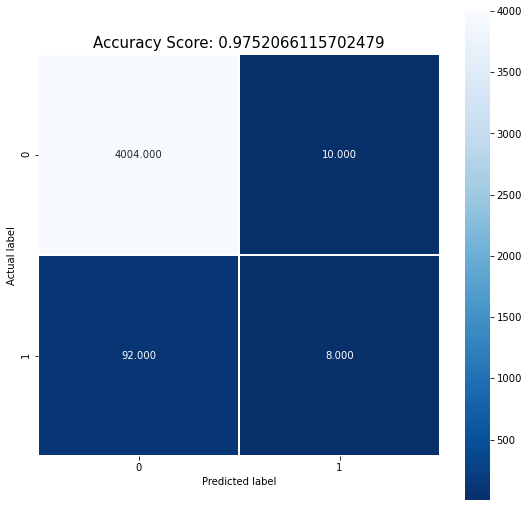

In [35]:
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [36]:
df_validation = pd.read_csv('validation-2009.csv')
df_validation['drafted'] = 1


In [37]:
stats = ["assists","points","total_rebounds","blocks","steals"]
for s in stats :
    df_validation[s] = df_validation[s] / df_validation["games_played"]
df_validation
df_validation.sort_values('points', ascending = False)

X = df_validation[["assists","games_played","points","total_rebounds","blocks","steals"]]
y = df_validation["drafted"]

In [38]:
y

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    1
Name: drafted, dtype: int64

In [39]:
X

,assists,games_played,points,total_rebounds,blocks,steals
0,2.073529,68,18.794118,11.838235,1.014706,1.058824
1,0.410000,100,10.280000,8.470000,4.170000,0.370000
2,3.739130,69,18.971014,5.420290,0.434783,1.913043
3,3.864865,37,17.081081,5.351351,0.783784,2.081081
4,6.013699,73,16.589041,2.712329,0.164384,1.465753
5,3.730769,104,25.336538,4.548077,0.269231,2.125000
6,0.824742,97,12.453608,7.865979,1.443299,0.546392
7,1.457143,35,13.857143,5.742857,0.371429,0.885714
8,3.900000,140,11.178571,6.928571,0.642857,1.500000
9,1.922330,103,14.970874,3.213592,0.145631,1.097087


In [40]:
predictions = logisticRegr.predict(X)
score = logisticRegr.score(X, y)

In [41]:
predictions

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score: 0.1276595744680851')

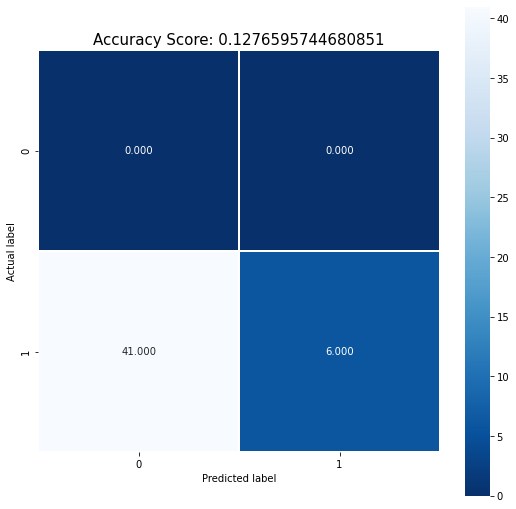

In [42]:
cm = metrics.confusion_matrix(y, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)


## KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

# Train the model using the training sets
knn.fit(X_train,y_train)

#Predict Output
predictions = knn.predict(X) # 0:Overcast, 2:Mild
score = knn.score(X, y)

Text(0.5, 1.0, 'Accuracy Score: 0.10638297872340426')

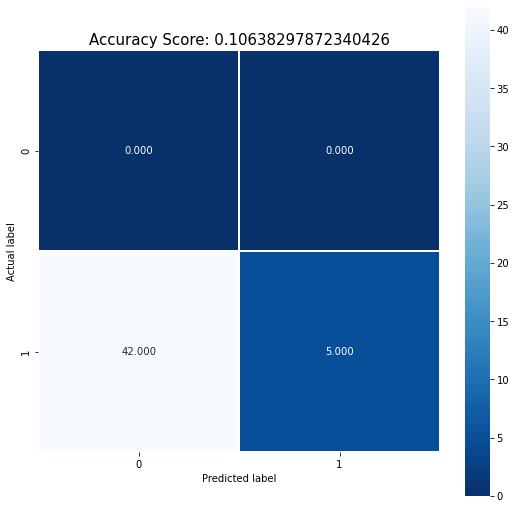

In [44]:
cm = metrics.confusion_matrix(y, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)


## Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=10000, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=10000)

In [46]:
# Actual class predictions
rf_predictions = model.predict(X)
# Probabilities for each class
rf_probs = model.predict_proba(X)[:, 1]

In [47]:
rf_predictions

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)